# SMS spam detection

## Part one import basic libraries and read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"/content/drive/MyDrive/dataset/spam.csv",encoding='latin-1')

## Part two data description and EDA

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'],axis=1,inplace=True)
df.rename({'v1':'label','v2':'text'},axis=1,inplace=True)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
max_len = max(len(x) for x in df['text'])
max_len

910

In [9]:
df['length']=df['text'].apply(len)
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
df['length'].aggregate([max,min,np.mean,np.median,np.std])

max       910.000000
min         2.000000
mean       80.118808
median     61.000000
std        59.690841
Name: length, dtype: float64

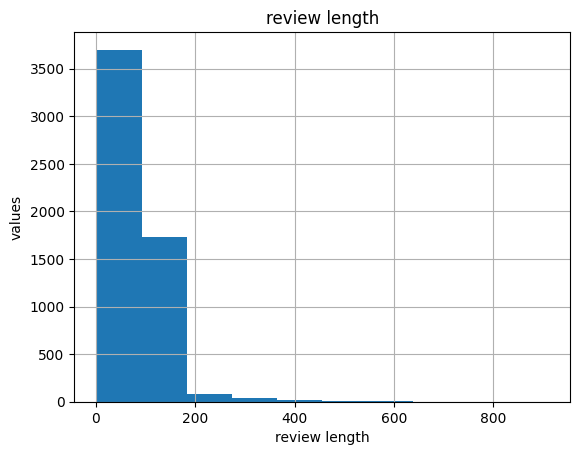

In [11]:
plt.hist(df['length'])
plt.xlabel('review length')
plt.ylabel('values')
plt.title('review length')
plt.grid()
plt.show()

In [12]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

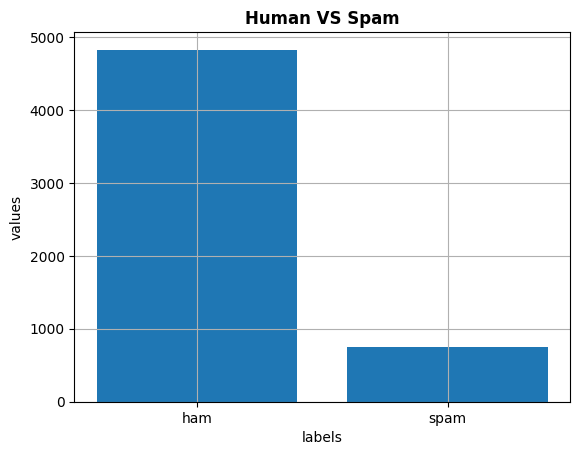

In [13]:
plt.bar(df['label'].value_counts().index, df['label'].value_counts())
plt.xlabel('labels')
plt.ylabel('values')
plt.title('Human VS Spam',weight='bold')
plt.grid()
plt.show()

## Part three data preprocessing and build vocab





In [14]:
df['label'].replace({'ham':0,'spam':1},inplace=True)
df.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
x=df['text']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [17]:
y=df['label']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [18]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))



def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def to_lowercase(text):
    return text.lower()


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)

def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  text=sent_tokenize(text)
  return word_tokenize("".join(text))

In [19]:
# clean scrapping
import html
import unicodedata
import string

# regex
import re

# tokenization
import nltk
nltk.download('punkt')

## sent_tokenize
from nltk.tokenize import sent_tokenize
## word_tokenize
from nltk.tokenize import word_tokenize

# remove stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

# stemming
from nltk.stem import PorterStemmer

# lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')


def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize

    #lemmatization is good in BOW
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [20]:
def normalize_corpus (corpus):
  return [normalize_text(s) for s in corpus]

In [21]:
texts=normalize_corpus(x)

#### build vocab using keras Tokenizer with mode freq

In [22]:
# fit the tokenizer

from keras.preprocessing.text import Tokenizer
vocab_sz=10000
tok=Tokenizer(num_words=vocab_sz,oov_token="UNK")
tok.fit_on_texts(texts)

tok.word_index

{'UNK': 1,
 'u': 2,
 'get': 3,
 'call': 4,
 'go': 5,
 'im': 6,
 'ur': 7,
 'come': 8,
 'know': 9,
 'free': 10,
 'dont': 11,
 'ok': 12,
 'send': 13,
 'day': 14,
 'like': 15,
 'time': 16,
 'want': 17,
 'ill': 18,
 'good': 19,
 'love': 20,
 'say': 21,
 'text': 22,
 'think': 23,
 'tell': 24,
 'need': 25,
 'see': 26,
 'take': 27,
 'one': 28,
 'make': 29,
 'today': 30,
 'r': 31,
 'txt': 32,
 'home': 33,
 'stop': 34,
 'reply': 35,
 'lor': 36,
 'sorry': 37,
 'still': 38,
 'back': 39,
 'mobile': 40,
 'n': 41,
 'phone': 42,
 'please': 43,
 'new': 44,
 'week': 45,
 'work': 46,
 'later': 47,
 'da': 48,
 'meet': 49,
 'well': 50,
 'hi': 51,
 'ask': 52,
 'miss': 53,
 'give': 54,
 'cant': 55,
 'night': 56,
 'claim': 57,
 'wait': 58,
 'thing': 59,
 'try': 60,
 'much': 61,
 'dear': 62,
 'oh': 63,
 'great': 64,
 'hey': 65,
 'pls': 66,
 'message': 67,
 'number': 68,
 'na': 69,
 'happy': 70,
 'friend': 71,
 'hope': 72,
 'leave': 73,
 'thank': 74,
 'way': 75,
 'c': 76,
 'wat': 77,
 'wan': 78,
 'prize': 79,
 

In [23]:
texts=tok.texts_to_matrix(texts,mode='freq')

In [24]:
y=np.asarray(y).astype('float32')

In [25]:
print (texts.shape)
print (y.shape)

(5572, 10000)
(5572,)


## Part four split data to train validation test

In [26]:
x_train=texts[:int(len(texts)*.6)]
y_train=y[:int(len(y)*.6)]
x_val=texts[int(len(texts)*.6):int(len(texts)*.8)]
y_val=y[int(len(y)*.6):int(len(y)*.8)]
x_test=texts[int(len(texts)*.8):]
y_test=y[int(len(y)*.8):]


print (x_train.shape)
print (y_train.shape)
print (x_val.shape)
print (y_val.shape)
print (x_test.shape)
print (y_test.shape)

(3343, 10000)
(3343,)
(1114, 10000)
(1114,)
(1115, 10000)
(1115,)


## Part five build network


#### 1- simple neural network model

In [27]:
from keras.layers import Dense
from keras.models import Sequential

model=Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
from keras.losses import binary_crossentropy
from keras.optimizers import RMSprop
from keras.metrics import binary_accuracy

model.compile(optimizer=RMSprop(lr=0.01),loss=binary_crossentropy,metrics=[binary_accuracy])

In [29]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=512,epochs=20)

Epoch 1/20
7/7 [==============================] - 1s 94ms/step - loss: 0.6772 - binary_accuracy: 0.8477 - val_loss: 0.6581 - val_binary_accuracy: 0.8600
Epoch 2/20
7/7 [==============================] - 0s 38ms/step - loss: 0.6460 - binary_accuracy: 0.8666 - val_loss: 0.6309 - val_binary_accuracy: 0.8600
Epoch 3/20
7/7 [==============================] - 0s 39ms/step - loss: 0.6185 - binary_accuracy: 0.8666 - val_loss: 0.6043 - val_binary_accuracy: 0.8600
Epoch 4/20
7/7 [==============================] - 0s 40ms/step - loss: 0.5913 - binary_accuracy: 0.8666 - val_loss: 0.5778 - val_binary_accuracy: 0.8600
Epoch 5/20
7/7 [==============================] - 0s 40ms/step - loss: 0.5641 - binary_accuracy: 0.8666 - val_loss: 0.5515 - val_binary_accuracy: 0.8600
Epoch 6/20
7/7 [==============================] - 0s 37ms/step - loss: 0.5372 - binary_accuracy: 0.8666 - val_loss: 0.5259 - val_binary_accuracy: 0.8600
Epoch 7/20
7/7 [==============================] - 0s 39ms/step - loss: 0.5110 - bi

#### Evaluate the model

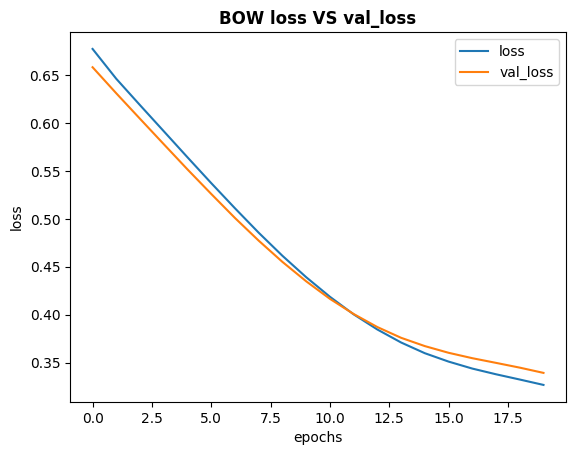

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.title("BOW loss VS val_loss",fontweight="bold")
plt.show()

In [31]:
from sklearn.metrics import accuracy_score

# Make predictions on test data
predictions = model.predict(x_train)

# Since the predictions are probabilities, we need to convert them to binary values
# You can use a threshold of 0.5 for binary classification
binary_predictions = (predictions > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_train, binary_predictions)

print("Accuracy on train data:", accuracy)

105/105 [==============================] - 1s 4ms/step
Accuracy on train data: 0.8665868979958121


In [33]:
# Use the trained model to predict labels for the test data
predictions = model.predict(x_val)

# Convert predicted probabilities to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_val,predicted_labels)

print("Accuracy on test set:", accuracy)

35/35 [==============================] - 0s 6ms/step
Accuracy on test set: 0.8599640933572711


In [32]:
# Make predictions on test data
predictions = model.predict(x_test)

# Since the predictions are probabilities, we need to convert them to binary values
# You can use a threshold of 0.5 for binary classification
binary_predictions = (predictions > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, binary_predictions)

print("Accuracy on test data:", accuracy)

35/35 [==============================] - 0s 4ms/step
Accuracy on test data: 0.8699551569506726


#### 2- naive bayes

In [34]:
x_train=texts[:int(len(texts)*.6)]
y_train=y[:int(len(y)*.6)]
x_test=texts[int(len(texts)*.6):]
y_test=y[int(len(y)*.6):]


print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(3343, 10000)
(3343,)
(2229, 10000)
(2229,)


In [51]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
naive_bayes.fit(x_train,y_train)

MultinomialNB(alpha=0.1)

In [52]:
predictions = naive_bayes.predict(x_test)

In [53]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8855989232839838